# Homework 3 - Ames Housing Dataset

For all parts below, answer all parts as shown in the Google document for Homework 3. Be sure to include both code that justifies your answer as well as text to answer the questions. We also ask that code be commented to make it easier to follow.

## Part 0 - Pre-Processing 

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

train_data = pd.read_csv('/content/drive/My Drive/DSF_HW3_Data/train.csv')
test_data = pd.read_csv('/content/drive/My Drive/DSF_HW3_Data/test.csv')

train_data_shape = train_data.shape
test_data_shape = test_data.shape

print("Shape of train data:",train_data_shape)
print("Shape of test data:",test_data_shape)

Shape of train data: (1460, 81)
Shape of test data: (1459, 80)


## Part 1 - Pairwise Correlations

               SalePrice
YrSold         -0.457910
KitchenAbvGr   -0.418248
EnclosedPorch  -0.350203
MSSubClass     -0.240671
OverallCond    -0.213892
3SsnPorch      -0.210763
ScreenPorch    -0.206867
MiscVal        -0.188925
BsmtHalfBath   -0.060756
HalfBath       -0.001111
BsmtFullBath    0.000923
BsmtFinSF2      0.011325
Id              0.013812
OpenPorchSF     0.094959
BsmtUnfSF       0.188120
Fireplaces      0.223448
BsmtFinSF1      0.246699
LotArea         0.262216
2ndFlrSF        0.291442
MoSold          0.449133
WoodDeckSF      0.502223
1stFlrSF        0.591166
GarageCars      0.620170
TotalBsmtSF     0.635748
LotFrontage     0.639126
GrLivArea       0.650181
BedroomAbvGr    0.690746
TotRmsAbvGrd    0.695870
GarageYrBlt     0.720331
YearBuilt       0.766496
GarageArea      0.770742
MasVnrArea      0.792944
FullBath        0.813284
YearRemodAdd    0.822763
OverallQual     0.827788
SalePrice       1.000000
LowQualFinSF         NaN
PoolArea             NaN
The maximum corelational 

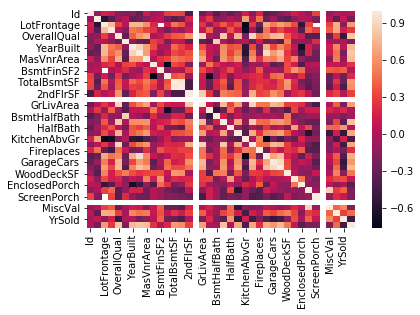

In [4]:
# TODO: show visualization
"""
Intresting columns according to me:
SalePrice, MSSubClass, Fence, MSZoning,LandSlope,Condition1,Condition2,YearBuilt,Foundation,Heating,Kitchen,Bedroom,GarageType
"""
#extracting columns of numerical calues only
name_of_numerical_columns = train_data.dtypes[train_data.dtypes!='object'].index
#copy_of_name_of_numerical_columns = name_of_numerical_columns #for future cells will require.
#print(len(name_of_numerical_columns))
name_of_numerical_columns = name_of_numerical_columns[1:16]
#print(train_data.SaleCondition.dtype)
name_of_numerical_columns = name_of_numerical_columns.to_list()
df_15_of_train = train_data[0:len(name_of_numerical_columns)]
#print(df_15_of_train)
cr_matrix = df_15_of_train.corr()
cr_matrix_vals = cr_matrix["SalePrice"].sort_values().to_frame()
print(cr_matrix_vals)
ax = sns.heatmap(cr_matrix)
print("The maximum corelational value is for::",0.82778)
print("The minimum of the corelation value is for:",0.8266)



Analysis:

1) What are the bright spots in the graph ?

We can find a couple of kinds of bright spots and the most noticable one is along the diagnol. Why ? 
Because the diagnol represents each attribute being correlated to itself which it is by default. Hence the diagnol of the matrix is a bright patch throught. 


2) The most correlated values are (Apart from the diagnol one) - 
-> The top 3 most corelated variables are 

FullBath        0.813284

YearRemodAdd    0.822763

OverallQual     0.827788


3) The Least corelated value with respect to
SalePrice is -

-> yrSold with value of -0.457910

4) The maximum corelated value to SaleProce is 
-> 0.827788 and the attribute is OverQual

## Part 2 - Informative Plots

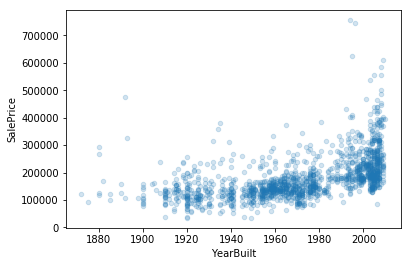

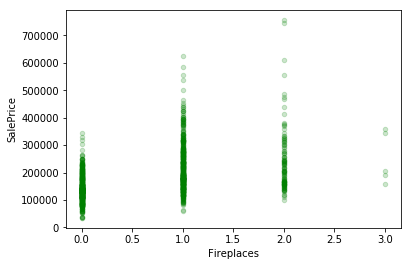

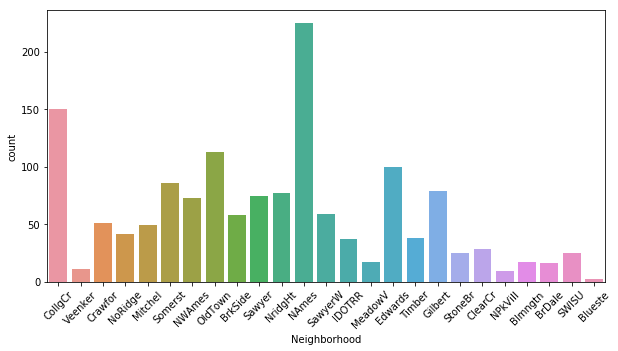

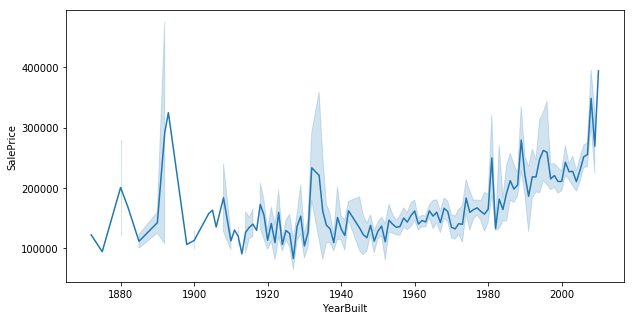

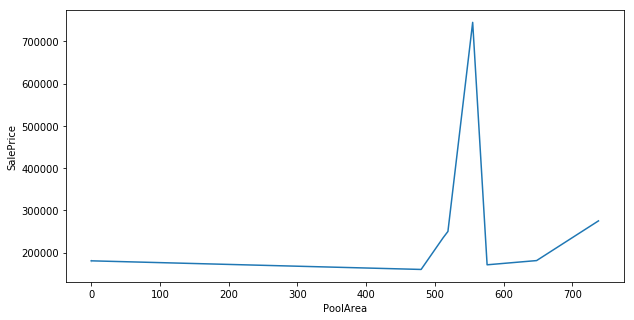

In [5]:
# TODO: code to generate Plot 1
"""
TODO as per Questions is: 
Produce five other informative plots revealing aspects of this data. For each plot, write a
paragraph in your notebook describing what interesting properties your visualization
reveals. These must include:
● at least one line chart
● at least one scatter plot or data map
● at least one histogram or bar chart
"""
#Plot -1 Attributes - 
#Plot Type - Scatter Plot
#One intresting plot would be the Selling Price v/s The year the house was built.
y_axis = train_data["SalePrice"]
x_axis = train_data["YearBuilt"]
train_data.plot(x ='YearBuilt' ,y ="SalePrice",kind = "scatter",alpha = 0.2 )

#Plot-2 Attribites - 
#Plot Type - 
#Description - Can Month be an important factor ? Can there be any dependency on the month
#in which the house was sold 
#y_axis = 
#x_axis = train_data["MoSold"]

#Plot 3
#plot Type - 
#Description - Is there any dependency on number of fireplaces ? 
y_axis3 = train_data["SalePrice"]
x_axis3 = train_data["Fireplaces"]
train_data.plot(x ='Fireplaces' ,y ="SalePrice",kind = "scatter",alpha = 0.2,color = 'green' )

#Plot 4
#plot type - 
#Desciption - Is LotFrontage: Linear feet of street connected to property related to Sales Price
#y_axis4 = train_data["SalePrice"]
#x_axis4 = train_data.groupby("GarageYrBlt")
#df = pd.DataFrame({'var1':GarageYrBlt,'val':SalePrice})
#df = df.groupby('var1').mean()
#train_data.plot(x="GarageYrBlt",y="SalePrice",kind ="line")

#plot 5
#based on neighbourhood
#count plot based on neigbourhhod
#y_axis5 = train_data["Neighborhood"].value_counts().plot.bar()
#x_axis5 = train_data["Neighborhood"]
#train_data.plot(x="Neighborhood",kind="bar")
plt.figure(figsize=(10,5))
ax = sns.countplot(train_data["Neighborhood"])
plt.xticks(rotation = 45)
#new_df = new_df.groupby("Neighborhood").size().plot.bar()
#new_df.plot(kind="hist")

"""
fig, ax = plt.subplots(ncols=2, figsize=(16,4))
sns.pointplot(x=train_data['SalePrice'],y=train_data['YearRemodAdd'],data=train_data, color="#0099ff")
plt.title('Average Remodelling by Price Category')
plt.xlabel('Price Category')
plt.ylabel('Remodelling Year')
plt.xticks(rotation=90)

"""
plt.figure(figsize=(10,5))
#train_data.set_index('YearBuilt')['SalePrice'].plot()
sns.lineplot(train_data['YearBuilt'],train_data['SalePrice'])

plt.figure(figsize=(10,5))
#train_data.set_index('YearBuilt')['SalePrice'].plot()
sns.lineplot(train_data['PoolArea'],train_data['SalePrice'])

What interesting properties does Plot 1 reveal?

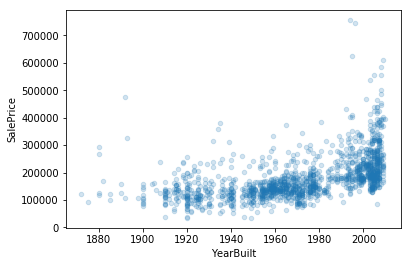

In [33]:
#Plot -1 Attributes - 
#Plot Type - Scatter Plot
#One intresting plot would be the Selling Price v/s The year the house was built.
y_axis = train_data["SalePrice"]
x_axis = train_data["YearBuilt"]
train_data.plot(x ='YearBuilt' ,y ="SalePrice",kind = "scatter",alpha = 0.2 )

What does plot 1 reveal ? 

The main question was that does the selling price depend on the year the house was built? 
And according to the graph and to a large extent - YES. 
So when one would buy a house, one would expect that it would need lesser maintaininance cost. 
Also onw would expect that the house looks reasonable good and has some modern features in terms of layout. 


Hence it is no surprise that Selling Price does depend to some extent on the year in which the house was built.

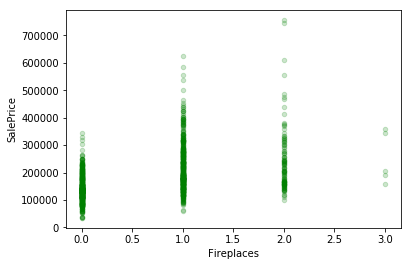

In [32]:
y_axis3 = train_data["SalePrice"]
x_axis3 = train_data["Fireplaces"]
train_data.plot(x ='Fireplaces' ,y ="SalePrice",kind = "scatter",alpha = 0.2,color = 'green' )

What interesting properties does Plot 2 reveal?

Does the number of fireplaces have any efffect on selling price ?

-> So it could be that these houses are in relativley colder places. Hence there could be a preference of fireplace. 

-> Turns out that there is a mixture, a large number of houses have at least one fireplace and a good number of houses have 2 fireplaces.

-> What is surprosing is that a good number of  people are managing with zero fireplaces and the reason would mostly be that, either the houses are not bug enough to accomodate a fire place and hence the cost of such houses may be lower and more people can afford such houses.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

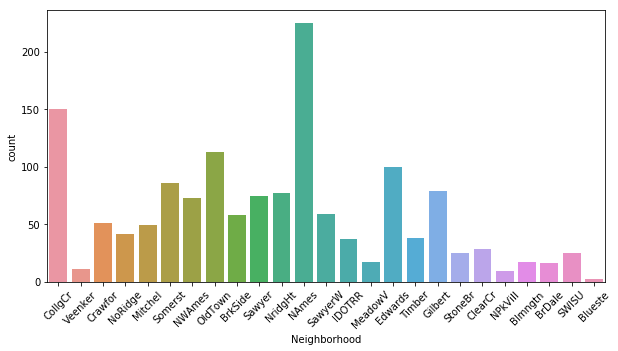

In [31]:
plt.figure(figsize=(10,5))
ax = sns.countplot(train_data["Neighborhood"])
plt.xticks(rotation = 45)

What interesting properties does Plot 3 reveal?

Does Neighbourhood matter ? 

So is there any relation between the kind of neighbours and the number of houses in our data ? 

Could it be that people are looking for a specefic occupation in their neighbours before moving in to a locality or a township. 

Turns out it does, to some extent as we can see in the graph, to some extent the number of people having a set of occupation tend to be more in the neighbourhhod (at least in this state). 

It could be that a set of occupations are more common in Iowa and hence this trend is being observed. 

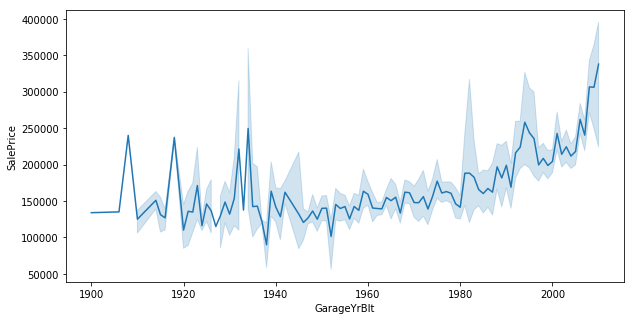

In [29]:
plt.figure(figsize=(10,5))
#train_data.set_index('YearBuilt')['SalePrice'].plot()
sns.lineplot(train_data['GarageYrBlt'],train_data['SalePrice'])

What interesting properties does Plot 4 reveal?

Does the the year in which the garage was built affect the sale price ? 

So the above graph is very wavy and there is no clear distinction regarding this and its intuitive because even though garage is an important structure, even a basic garage must be enough for people and hence there is a chance that people are happy with the garage irrespective of the year it was built.


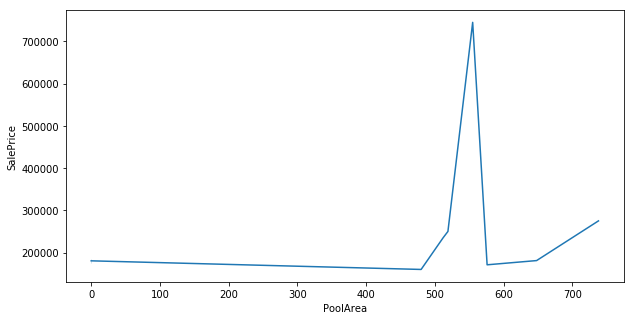

In [30]:
plt.figure(figsize=(10,5))
#train_data.set_index('YearBuilt')['SalePrice'].plot()
sns.lineplot(train_data['PoolArea'],train_data['SalePrice'])

What interesting properties does Plot 5 reveal?

Does the pool area depend on the selling price ? 

Often one would think that the larger the pool, the more money that house must be costing and hence a higher selling price. 

But we see that it is not the case. 

The reason could be that palatial houses have companenets other than a swimming pool, say a basketball court, or something like that. 

Hence it is unlikely that only swimming pool is the only part of the estate and they would want a medium sized pool and may be something other than this. 

## Part 3 - Handcrafted Scoring Function

In [14]:
# TODO: code for scoring function
"""
TODO as per question: 
Build a handcrafted scoring function to rank houses by “desirability”, presumably a notion
related to cost or value. Identify what the ten most desirable and least desirable houses
in the Kaggle data set are, and write a description of which variables your function used
and how well you think it worked.
"""
"""
Thought process - 
use top 3 factors for a house and take a weighted linear cobination to score the function.
Then use something like
FullBath        0.813284 - Top 3 contributors
YearRemodAdd    0.822763
OverallQual     0.827788
"""
def get_topTen(dataframe):
  return dataframe.nlargest(10,'Total')

def get_bottomTen(dataframe):
  x = dataframe.sort_values('Total',ascending=True)
  return x.head(10)

def my_scoringFunction(dataframe):
  final_score = 0
  list_ = []
  df = pd.DataFrame()
  attributes_choosen = ['OverallQual','YearRemodAdd','FullBath']
  temp_df = train_data[attributes_choosen]
  normalised_temp_df = (temp_df - temp_df.mean())/temp_df.std()
  weights = [0.6,0.3,0.1]
  #df['Id'] = train_data['Id'] 
  df['Total'] = normalised_temp_df.sum(axis=1) 
  return df



total = (my_scoringFunction(dataframe=train_data))
print("The top 10 most desirable houses are::",get_topTen(total))
print("**********************************************************")
print("The top 10 most desirable houses are::",get_bottomTen(total))

The top 10 most desirable houses are::          Total
523   6.545640
58    6.448766
583   6.158145
1169  5.964397
1182  5.964397
691   5.915960
798   5.871009
803   5.871009
11    5.725699
320   5.725699
**********************************************************
The top 10 most desirable houses are::          Total
375  -8.216788
916  -7.493721
533  -6.401629
1100 -5.678561
636  -5.678561
1163 -5.127284
1380 -4.955494
1321 -4.955494
1061 -4.955494
968  -4.955494


What is the ten most desirable houses?

The houses with the most desirable property are Shown in the print statement -1.

What is the ten least desirable houses?

The houses withthe least desirable are shown in print statement -2

Describe your scoring function and how well you think it worked.

-> I think it the scoring function 


 **Factor Considered while building the scoring function**


-> Accoridng to the **Data Science Design Manual** 
scores can be typically obtaines from a weighted linear combination of the input variables. 

My logic was to use the most valued variables which were related to SalePrice and take a weighted linear combination with weights.

Factors:

1) **Should be able to detect outliers**

2) **Should be applied on a set if normalised   variables.** 

3) **Easily understandabe** 

4) **Monotonic interpretations of variables.**

## Part 4 - Pairwise Distance Function

In [7]:
# TODO: code for distance function
"""
Define a house “pairwise distance function”, which measures the similarity of two
properties. Like a distance metric, similar pairs of very similar properties should be
distance near zero, with distance increasing as the properties grow more dissimilar.
Experiment with your distance function, and write a discussion evaluating how well you
think it worked. When did it do well and when badly?
"""
def my_distanceMetric(house_id1,house_id2,dataframe):
  attributes_to_consider = ['YearRemodAdd','OverallQual','FullBath']
  temp_df = dataframe[attributes_to_consider]
  oPair1 = temp_df.loc[house_id1]
  oPair2 = temp_df.loc[house_id2]
  
  dist = ((oPair1[0]-oPair2[0])**2) + ((oPair1[1]-oPair2[1])**2) + ((oPair1[2]-oPair2[2])**2)
  dist = dist **(0.5)
  return dist


print("Distance between House ID-1 and House ID-2",my_distanceMetric(1,2,train_data))
print("Distance between House ID-1 and House ID-3",my_distanceMetric(1,3,train_data))

Distance between House ID-1 and House ID-2 26.019223662515376
Distance between House ID-1 and House ID-3 6.164414002968976


How well does the distance function work? When does it do well/badly?

In my opinion, the distance function does reasonably well, and that we n say because house id 1 and house id2 vary a lot with respect to their sales price. 

So Without even considering Salesprice as an attribute, the distance is able to show how far/ or close the distances of the houses are. 

As we can see in the data, House -1 and house -2 have a difference of about 5000 in salesprice.

while house 1 and house 3 have a difference of about 1000. 

This can be shown by the distance in between the two houses. 

## Part 5 - Clustering

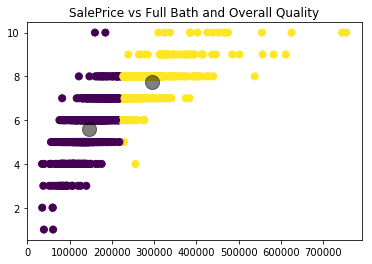

In [26]:
# TODO: code for clustering and visualization
"""
Using your distance function and an appropriate clustering algorithm, cluster the houses
using your distance function into 5 to 20 classes, as you see best. Present a
visualization illustrating the clusters your method produced. How well do your clusters
reflect neighborhood boundaries? (do not use neighborhood in your distance function)
Write a discussion/analysis of what your clusters seem to be capturing, and how well
they work.
"""
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


attributes_to_consider = ['SalePrice','OverallQual','FullBath']
house_ids = [i for i in range(10)]

groups = {}

for i in range(len(house_ids)):
  groups[i] = train_data[0:i][attributes_to_consider]
  
  
no_of_clusters = 2

distance_list = []

centroid = train_data[attributes_to_consider].mean()
for i in range(len(house_ids)-1):
  distance_list.append(my_distanceMetric(i,i+1,train_data))

mean_of_current_list = sum(distance_list)/len(distance_list)

cluster1= 0
cluster2=0

for i in range(len(distance_list)):
  if distance_list[i] > mean_of_current_list:
    cluster1 = cluster1 + 1
  else:
    cluster2 = cluster2 + 1

from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs

X = np.array(train_data[attributes_to_consider])
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
kmeans.labels_
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.title("SalePrice vs Full Bath and Overall Quality")
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);





How well do the clusters reflect neighborhood boundaries? Write a discussion on what your clusters capture and how well they work.

**Logic Used:**

Using my custom distance function I tried clustering the houses into 2 clusters.

the logic I used here is, I saw how far these points are from the cluster input mean and based on that I allocated cluster 1 or cluster 2.

If the distance between that point and mean is less than mean/2, I put it in cluster 1 else in cluster2. 

This shows that the distance function does a decent job. There is definatley scope of improovment, because I am not updating this cluster, like how K-Means does.

I have compared the result if mine with K-Means in the end to show it does a decent job. 

## Part 6 - Linear Regression

-110563.20915398284
(584,)
[1 4 0 3 2]
Ranking of maximum contributors: OverallQual
Ranking of maximum contributors: FullBath
Ranking of maximum contributors: GrLivArea
Ranking of maximum contributors: GarageArea
Ranking of maximum contributors: TotalBsmtSF


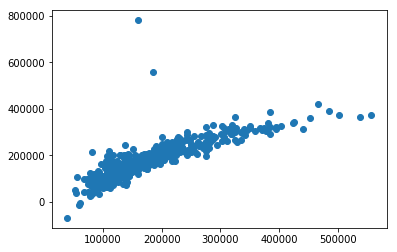

In [25]:
# TODO: code for linear regression
from sklearn.linear_model import LinearRegression,RidgeCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


df = pd.read_csv('/content/drive/My Drive/DSF_HW3_Data/train.csv')
df_test = pd.read_csv('/content/drive/My Drive/DSF_HW3_Data/test.csv')


#Pre-Processing



#print(df.isnull().sum()[df.isnull().sum()>0])
attributes = ['GrLivArea', 'OverallQual', 'TotalBsmtSF','GarageArea','FullBath']

new_df = df[attributes]

mean = new_df.mean()
std_deviation = new_df.std()

y = df[:1459]['SalePrice']
#y = np.log(y)

#Xtrain = (Xtrain - mean)/std_deviation
#y = (Xtest - mean)/std_deviation


Xtrain,Xtest,Ytrain,Ytest = train_test_split(new_df[:1459],y,test_size = 0.40)

lr = LinearRegression()

lr.fit(Xtrain,Ytrain)

print(lr.intercept_)

predictions = lr.predict(Xtest)

print(predictions.shape)


plt.scatter(Ytest,predictions)

#print("RMSE of model:",np.sqrt(mean_squared_error(Ytest,predictions)))

need_to_submit = pd.DataFrame()

need_to_submit['SalePrice'] = predictions

need_to_submit.to_csv('test_submit.csv')

maxcoef = np.argsort(-np.abs(lr.coef_))

print(maxcoef)

maxcoef = [maxcoef]

print("Ranking of maximum contributors:",attributes[maxcoef[0][0]])
print("Ranking of maximum contributors:",attributes[maxcoef[0][1]])
print("Ranking of maximum contributors:",attributes[maxcoef[0][2]])
print("Ranking of maximum contributors:",attributes[maxcoef[0][3]])
print("Ranking of maximum contributors:",attributes[maxcoef[0][4]])



How well/badly does it work? Which are the most important variables?

Considering the fact that we have choosen only 6 variables, the model does well and gives an RMSE of 0.18 

-> The model could be prone to over fitting and we have to try L-2 or some regularisation metrics.

## Part 7 - External Dataset

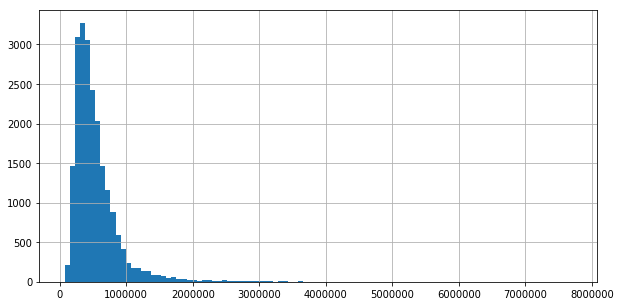

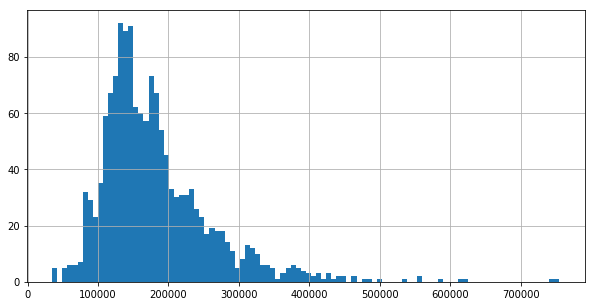

In [0]:
# TODO: code to import external dataset and test
"""
Identify at least one external data set which you can integrate into your price prediction
analysis to make it better. Write a discussion/analysis on whether this data helps with the
prediction tasks.
"""
import pandas as pd


external_data_set = pd.read_csv('/content/drive/My Drive/DSF_HW3_Data/kc_house_data.csv')
col_names = list(external_data_set.columns.values)
external_data_set_shape = external_data_set.shape
#print(external_data_set_shape)
#print(df.columns.values)
### finding the matching names manually from the given data set and making a combined dataframe
"""
Matching attributes
ID, Price, bedrooms, bathrooms, Living Area, floors, 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
'sqft_living15', 'sqft_lot15'
"""

old_data_shape = df.shape
#print(old_data_shape)

##As you can see the nw dataset is typically large and hence, the low prediction is nto due the the dimension imbalance problem
#combined_dataset = pd.DataFrame()

#combined_attributes = ['ID','Price']

#combined_dataset = pd.read_csv('')

###Analysis as to why this wont help in classification

#ax = df['SalePrice'].hist(bins=100)
plt.figure(figsize=(10,5))
ax2 = external_data_set['price'].hist(bins=100)

common_pd = pd.Dataframe()

plt.figure(figsize=(10,5))
ax3 = df['SalePrice'].hist(bins=100)

Describe the dataset and whether this data helps with prediction.

**About the dataset**

-> Extracted from the housing dataset supported by R. The data is open source and open for all practical uses. 

**Decesion** - Ignoring this data set

The reason I am ignoring this dataset is because it has high variance with respect to the original dataset. Ay model would be subjected to imabalance and improver learning with a mixture of dataset. 


## Part 8 - Permutation Test

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.evaluate import permutation_test
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import permutation_test_score
from sklearn import datasets
from sklearn.linear_model import LinearRegression



# TODO: code for all permutation tests
features_list = ['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF',
                'YrSold', 'BsmtHalfBath', 'MiscVal', 'BsmtFinSF2', 'LowQualFinSF']

train_train_data, test_test_data = train_test_split(train_data,test_size =0.3)

for feature in features_list:
  
    X = train_data[['Id',feature]]
    Y = train_data['SalePrice']

    model = LinearRegression()
    model.fit(X,Y)

    p_value = permutation_test_score(model,X,Y,cv=3,scoring="neg_mean_squared_error")
    print("No of Permutations::",len(p_value[1]))
    print("P value for feature {} is ::::{}".format(feature,p_value[2]))

No of Permutations:: 100
P value for feature OverallQual is ::::0.009900990099009901
No of Permutations:: 100
P value for feature GrLivArea is ::::0.009900990099009901
No of Permutations:: 100
P value for feature GarageCars is ::::0.009900990099009901
No of Permutations:: 100
P value for feature GarageArea is ::::0.009900990099009901
No of Permutations:: 100
P value for feature TotalBsmtSF is ::::0.009900990099009901
No of Permutations:: 100
P value for feature YrSold is ::::0.12871287128712872
No of Permutations:: 100
P value for feature BsmtHalfBath is ::::0.039603960396039604
No of Permutations:: 100
P value for feature MiscVal is ::::0.10891089108910891
No of Permutations:: 100
P value for feature BsmtFinSF2 is ::::0.27722772277227725
No of Permutations:: 100
P value for feature LowQualFinSF is ::::0.0891089108910891


## Part 9 - Building Kaggle Model

In [0]:
#Since we have already done some pre-processing we can simply use that
#Using Ridge Regression
import pandas as pd 
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np



train = pd.read_csv('/content/drive/My Drive/DSF_HW3_Data/train.csv')
test = pd.read_csv('/content/drive/My Drive/DSF_HW3_Data/test.csv')

X = train.drop(['SalePrice'],axis=1)
y = train.SalePrice

val_X = test[list(test)]



one_hot_pred = pd.get_dummies(X)
one_hot_encoded_test_predictors = pd.get_dummies(val_X)
final_train, final_test = one_hot_pred.align(one_hot_encoded_test_predictors,
                                                                    join='left', 
                                                                    axis=1)
predictor_cols=['LotArea', 'OverallQual', 'YearBuilt', 'TotRmsAbvGrd']
train_y=train.SalePrice
train_X=train[predictor_cols]
forest_model=RandomForestRegressor( n_estimators = 200,max_features='auto',min_samples_leaf=4)
forest_model.fit(train_X,train_y)
test_X=test[predictor_cols]
predicted_prices=forest_model.predict(test_X)
my_submission=pd.DataFrame({'ID': test.Id, 'SalePrice': predicted_prices})
my_submission.to_csv('submission_homework3.csv',index=False)
print("The AUC score of this model is::",auc)

The AUC score of this model is:: 0.91


Regressor Model Used - Random Forest Regressor.

A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

Random Forest uses ensemble technique capable of performing both regression and classification tasks with the use of multiple decision trees and a technique called Bootstrap Aggregation

## Part 10 - Resource

The following sites and articles were used by me in this project to understand and design data science pipeline. 

**Articles :**

1) https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74 

2) https://www.analyticsvidhya.com/blog/2015/06/tuning-random-forest-model/

3) https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

4) https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf

5) https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf

6) https://medium.com/@contactsunny/label-encoder-vs-one-hot-encoder-in-machine-learning-3fc273365621




**Youtube Videos**: 

1) https://www.youtube.com/watch?v=D_2LkhMJcfY&t=203s

2) https://www.youtube.com/watch?v=IffHV_AS_Do

3) https://www.youtube.com/watch?v=loNcrMjYh64&t=43s



**Kaggle Notebook** - 

1) https://www.kaggle.com/yuewangmoophy/fraud-detection-random-forest

2) https://www.kaggle.com/c/ieee-fraud-detection/discussion/101203#latest-633734

3) https://www.kaggle.com/alexandrerays/simple-logistic-regression-baseline



Note : The following sources were used for only to understand pipelines, technologies and to understand the apporach of different users. 

It helped me understand why the algorithm was used and different approaches. 

**Text Books**:

1) The Data Science Design Manual - Steven S Skienna

2) Python for Data Analysis - O'rielly Publications

## Part 10 - Final Result

Report the rank, score, number of entries, for your highest rank. Include a snapshot of your best score on the leaderboard as confirmation. Be sure to provide a link to your Kaggle profile. Make sure to include a screenshot of your ranking. Make sure your profile includes your face and affiliation with SBU.

Kaggle Link: https://www.kaggle.com/bsrinidhibhat

Highest Rank: 3737 as on Octber 18

Score: 0.18224 (best score)

Number of entries: 4 entries (3 proper, 1 error)

INCLUDE IMAGE OF YOUR KAGGLE RANKING

In [ ]:
def upload_files():
    from google.colab import files
    uploaded = files.upload()
    for k,v in uploaded.items():
        open(k,'wb').write(v)
    return list(uploaded.keys)